CO653 - Learning Machines and Intelligent Agents

Team mates:

Muneef - 22206529

Entwan - 22135347


In [5]:
#Importing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.utils import resample
import numpy as np
#import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
train = pd.read_csv("data/Loan_train.csv")
test = pd.read_csv("data/Loan_test.csv")

train = pd.DataFrame(train)
test = pd.DataFrame(test)

In [7]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
train.shape

(614, 13)

In [9]:
test.shape

(367, 12)

In [10]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [12]:
# Calculate the percentage of missing values per column
missing_percentage = train.isnull().mean() * 100

# Display columns with more than 0% missing values
print(missing_percentage[missing_percentage > 0])

Gender              2.117264
Married             0.488599
Dependents          2.442997
Self_Employed       5.211726
LoanAmount          3.583062
Loan_Amount_Term    2.280130
Credit_History      8.143322
dtype: float64


In [13]:
# Calculate the percentage of missing values per column
missing_percentage = test.isnull().mean() * 100

# Display columns with more than 0% missing values
print(missing_percentage[missing_percentage > 0])

Gender              2.997275
Dependents          2.724796
Self_Employed       6.267030
LoanAmount          1.362398
Loan_Amount_Term    1.634877
Credit_History      7.901907
dtype: float64


In [14]:
missing = train[train.isnull().any(axis=1)]
missing

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,LP002933,NaN,No,3+,Graduate,Yes,9357,0.0,292.0,360.0,1.0,Semiurban,Y
597,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
601,LP002950,Male,Yes,0,Not Graduate,NaN,2894,2792.0,155.0,360.0,1.0,Rural,Y


In [15]:
def handle_missing_values(data, threshold=0.5):
    """
    Handles missing values in a dataset:
    - Drops columns with more than a specified threshold of missing values.
    - Fills remaining missing values with median for numeric columns and mode for categorical columns.

    Parameters:
        data (pd.DataFrame): The input dataset.
        threshold (float): The proportion of missing values above which columns are dropped (default 0.5).

    Returns:
        pd.DataFrame: The cleaned dataset.
    """
    # Step 2: Fill numeric columns with median
    numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_columns:
        if data[col].isnull().sum() > 0:  # Only fill if there are missing values
            data[col] = data[col].fillna(data[col].median())

    # Step 3: Fill categorical columns with mode
    categorical_columns = data.select_dtypes(include=['object', 'category']).columns
    for col in categorical_columns:
        if data[col].isnull().sum() > 0:  # Only fill if there are missing values
            data[col] = data[col].fillna(data[col].mode()[0])  # Use the most frequent value

    return data

# Example usage
train = handle_missing_values(train, threshold=0.5)

# Check the result
print(train.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [16]:
# Example usage
test = handle_missing_values(test, threshold=0.5)

# Check the result
print(train.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [17]:
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [18]:
train = train.drop("Loan_ID", axis = 1)

In [19]:
test = test.drop("Loan_ID", axis = 1)

In [20]:
# Get categorical columns present in the current DataFrame
categorical_columns = train.select_dtypes(include=['object', 'category']).columns

label_encoder = LabelEncoder()
# Dictionary to store mappings
label_mappings_train = {}


for column in categorical_columns:
    train[column] = label_encoder.fit_transform(train[column])
    label_mappings_train[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

In [21]:
# Get categorical columns present in the current DataFrame
categorical_columns = test.select_dtypes(include=['object', 'category']).columns


label_mappings_test = {}

for column in categorical_columns:
    test[column] = label_encoder.fit_transform(test[column])
    label_mappings_test[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

In [22]:
# Print the mappings
for col, mapping in label_mappings_train.items():
    print(f"Column: {col}")
    print(mapping)
    print()

Column: Gender
{'Female': 0, 'Male': 1}

Column: Married
{'No': 0, 'Yes': 1}

Column: Dependents
{'0': 0, '1': 1, '2': 2, '3+': 3}

Column: Education
{'Graduate': 0, 'Not Graduate': 1}

Column: Self_Employed
{'No': 0, 'Yes': 1}

Column: Property_Area
{'Rural': 0, 'Semiurban': 1, 'Urban': 2}

Column: Loan_Status
{'N': 0, 'Y': 1}



In [23]:
# Print the mappings
for col, mapping in label_mappings_test.items():
    print(f"Column: {col}")
    print(mapping)
    print()

Column: Gender
{'Female': 0, 'Male': 1}

Column: Married
{'No': 0, 'Yes': 1}

Column: Dependents
{'0': 0, '1': 1, '2': 2, '3+': 3}

Column: Education
{'Graduate': 0, 'Not Graduate': 1}

Column: Self_Employed
{'No': 0, 'Yes': 1}

Column: Property_Area
{'Rural': 0, 'Semiurban': 1, 'Urban': 2}



In [24]:
train.head(15)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
6,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1
7,1,1,3,0,0,3036,2504.0,158.0,360.0,0.0,1,0
8,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,2,1
9,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,1,0


In [25]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


In [50]:
train["ApplicantIncome"].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [51]:
train["LoanAmount"].describe()

count    614.000000
mean     145.752443
std       84.107233
min        9.000000
25%      100.250000
50%      128.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64

<Axes: >

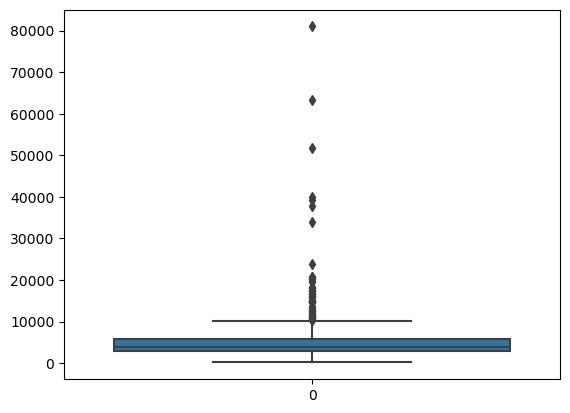

In [52]:
'ApplicantIncome	CoapplicantIncome	LoanAmount'

sns.boxplot(train["ApplicantIncome"])

<Axes: >

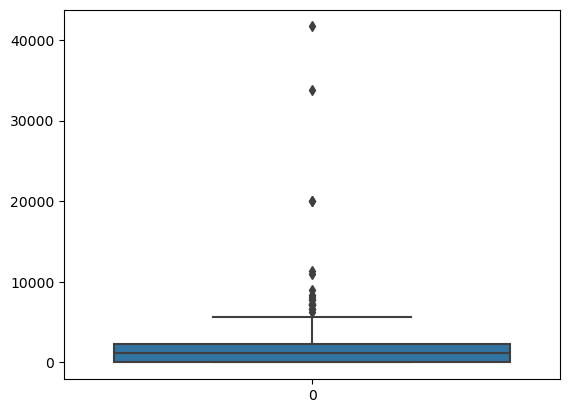

In [53]:
'ApplicantIncome	CoapplicantIncome	LoanAmount'

sns.boxplot(train["CoapplicantIncome"])

<Axes: >

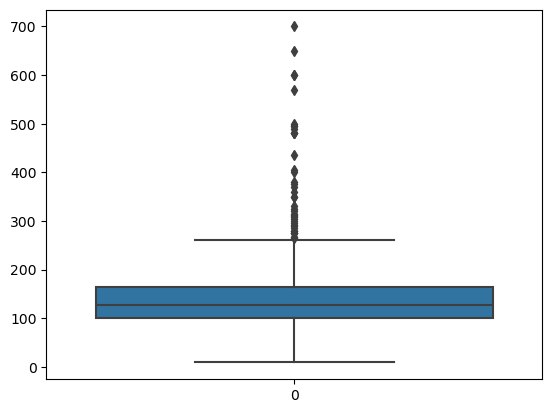

In [54]:
'ApplicantIncome	CoapplicantIncome	LoanAmount'

sns.boxplot(train["LoanAmount"])

In [55]:
unique = train["Loan_Amount_Term"].unique()
unique

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [26]:
# Define the numerical columns that need scaling
high_num_cols = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]

# Create a copy of the DataFrame (optional, to avoid modifying the original)
train_scaled = train.copy()
test_scaled = train.copy()

# Apply StandardScaler only to the selected numerical columns
scaler = StandardScaler()
train_scaled[high_num_cols] = scaler.fit_transform(train_scaled[high_num_cols])
test_scaled[high_num_cols] = scaler.fit_transform(test_scaled[high_num_cols])

# Now df_scaled has the scaled numerical features while categorical ones remain unchanged


In [45]:
train_scaled.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.072991,-0.554487,-0.211241,0.273231,1.0,2,1
1,1,1,1,0,0,-0.134412,-0.038732,-0.211241,0.273231,1.0,0,0
2,1,1,0,0,1,-0.393747,-0.554487,-0.948996,0.273231,1.0,2,1
3,1,1,0,1,0,-0.462062,0.251980,-0.306435,0.273231,1.0,2,1
4,1,0,0,0,0,0.097728,-0.554487,-0.056551,0.273231,1.0,2,1


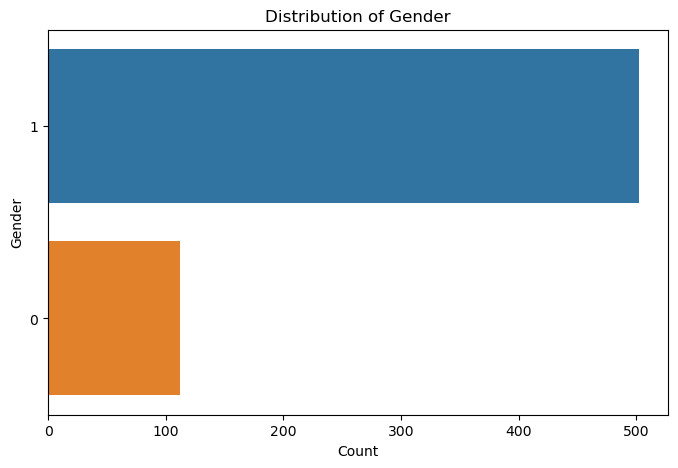

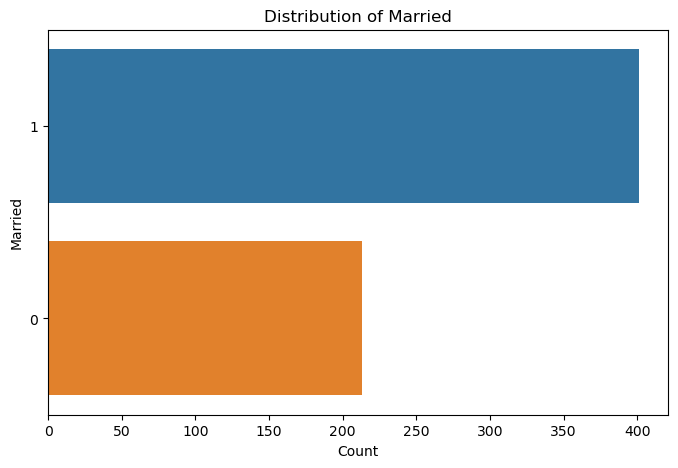

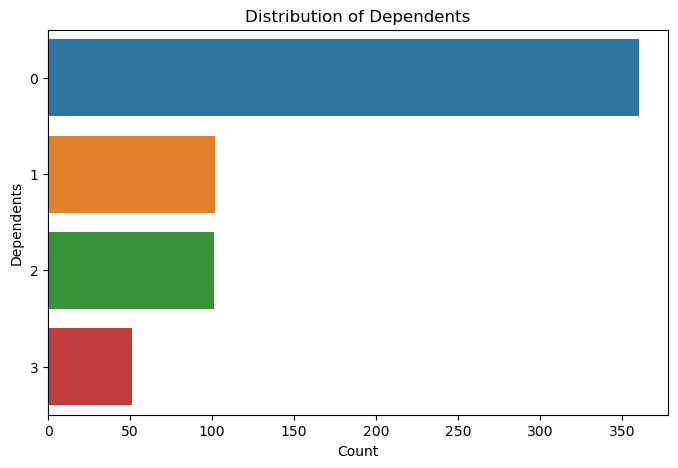

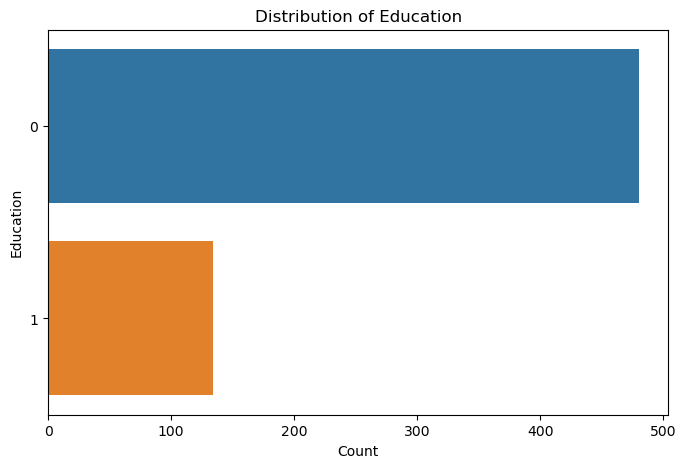

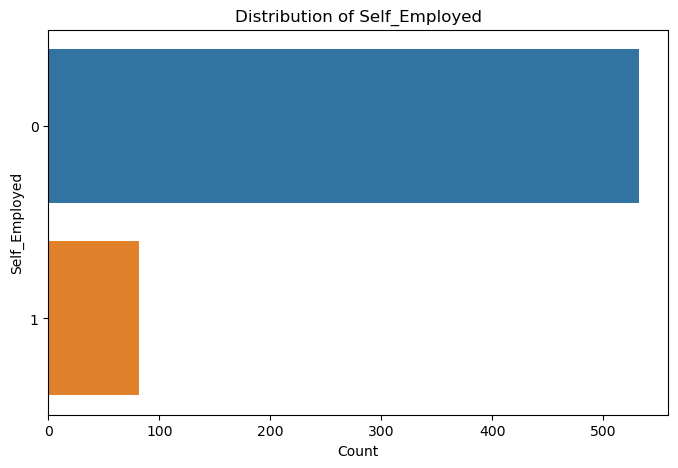

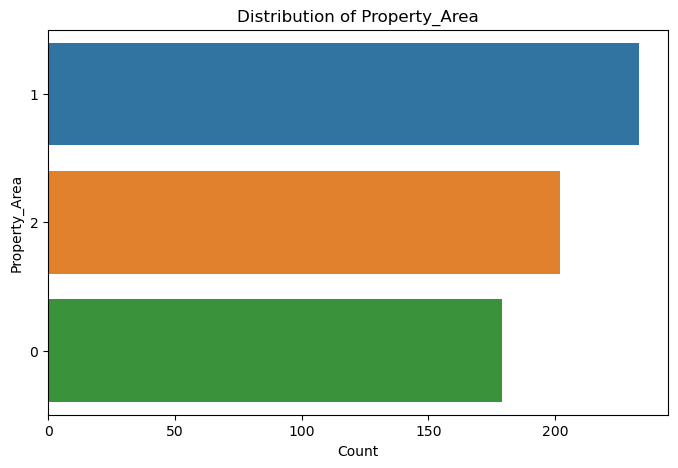

In [46]:
# Plot categorical feature distributions
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(y=train_scaled[col], order=train[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.show()

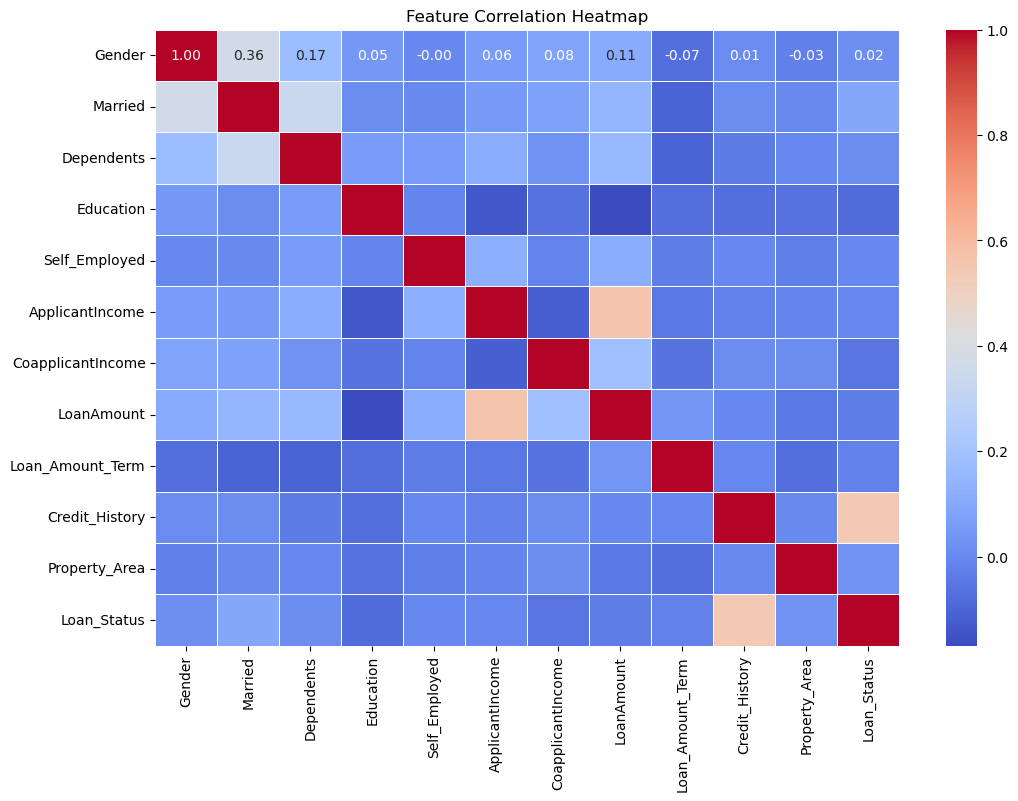

In [47]:
plt.figure(figsize=(12, 8))
sns.heatmap(train_scaled.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


c:\Users\Entwan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Entwan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Entwan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Entwan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

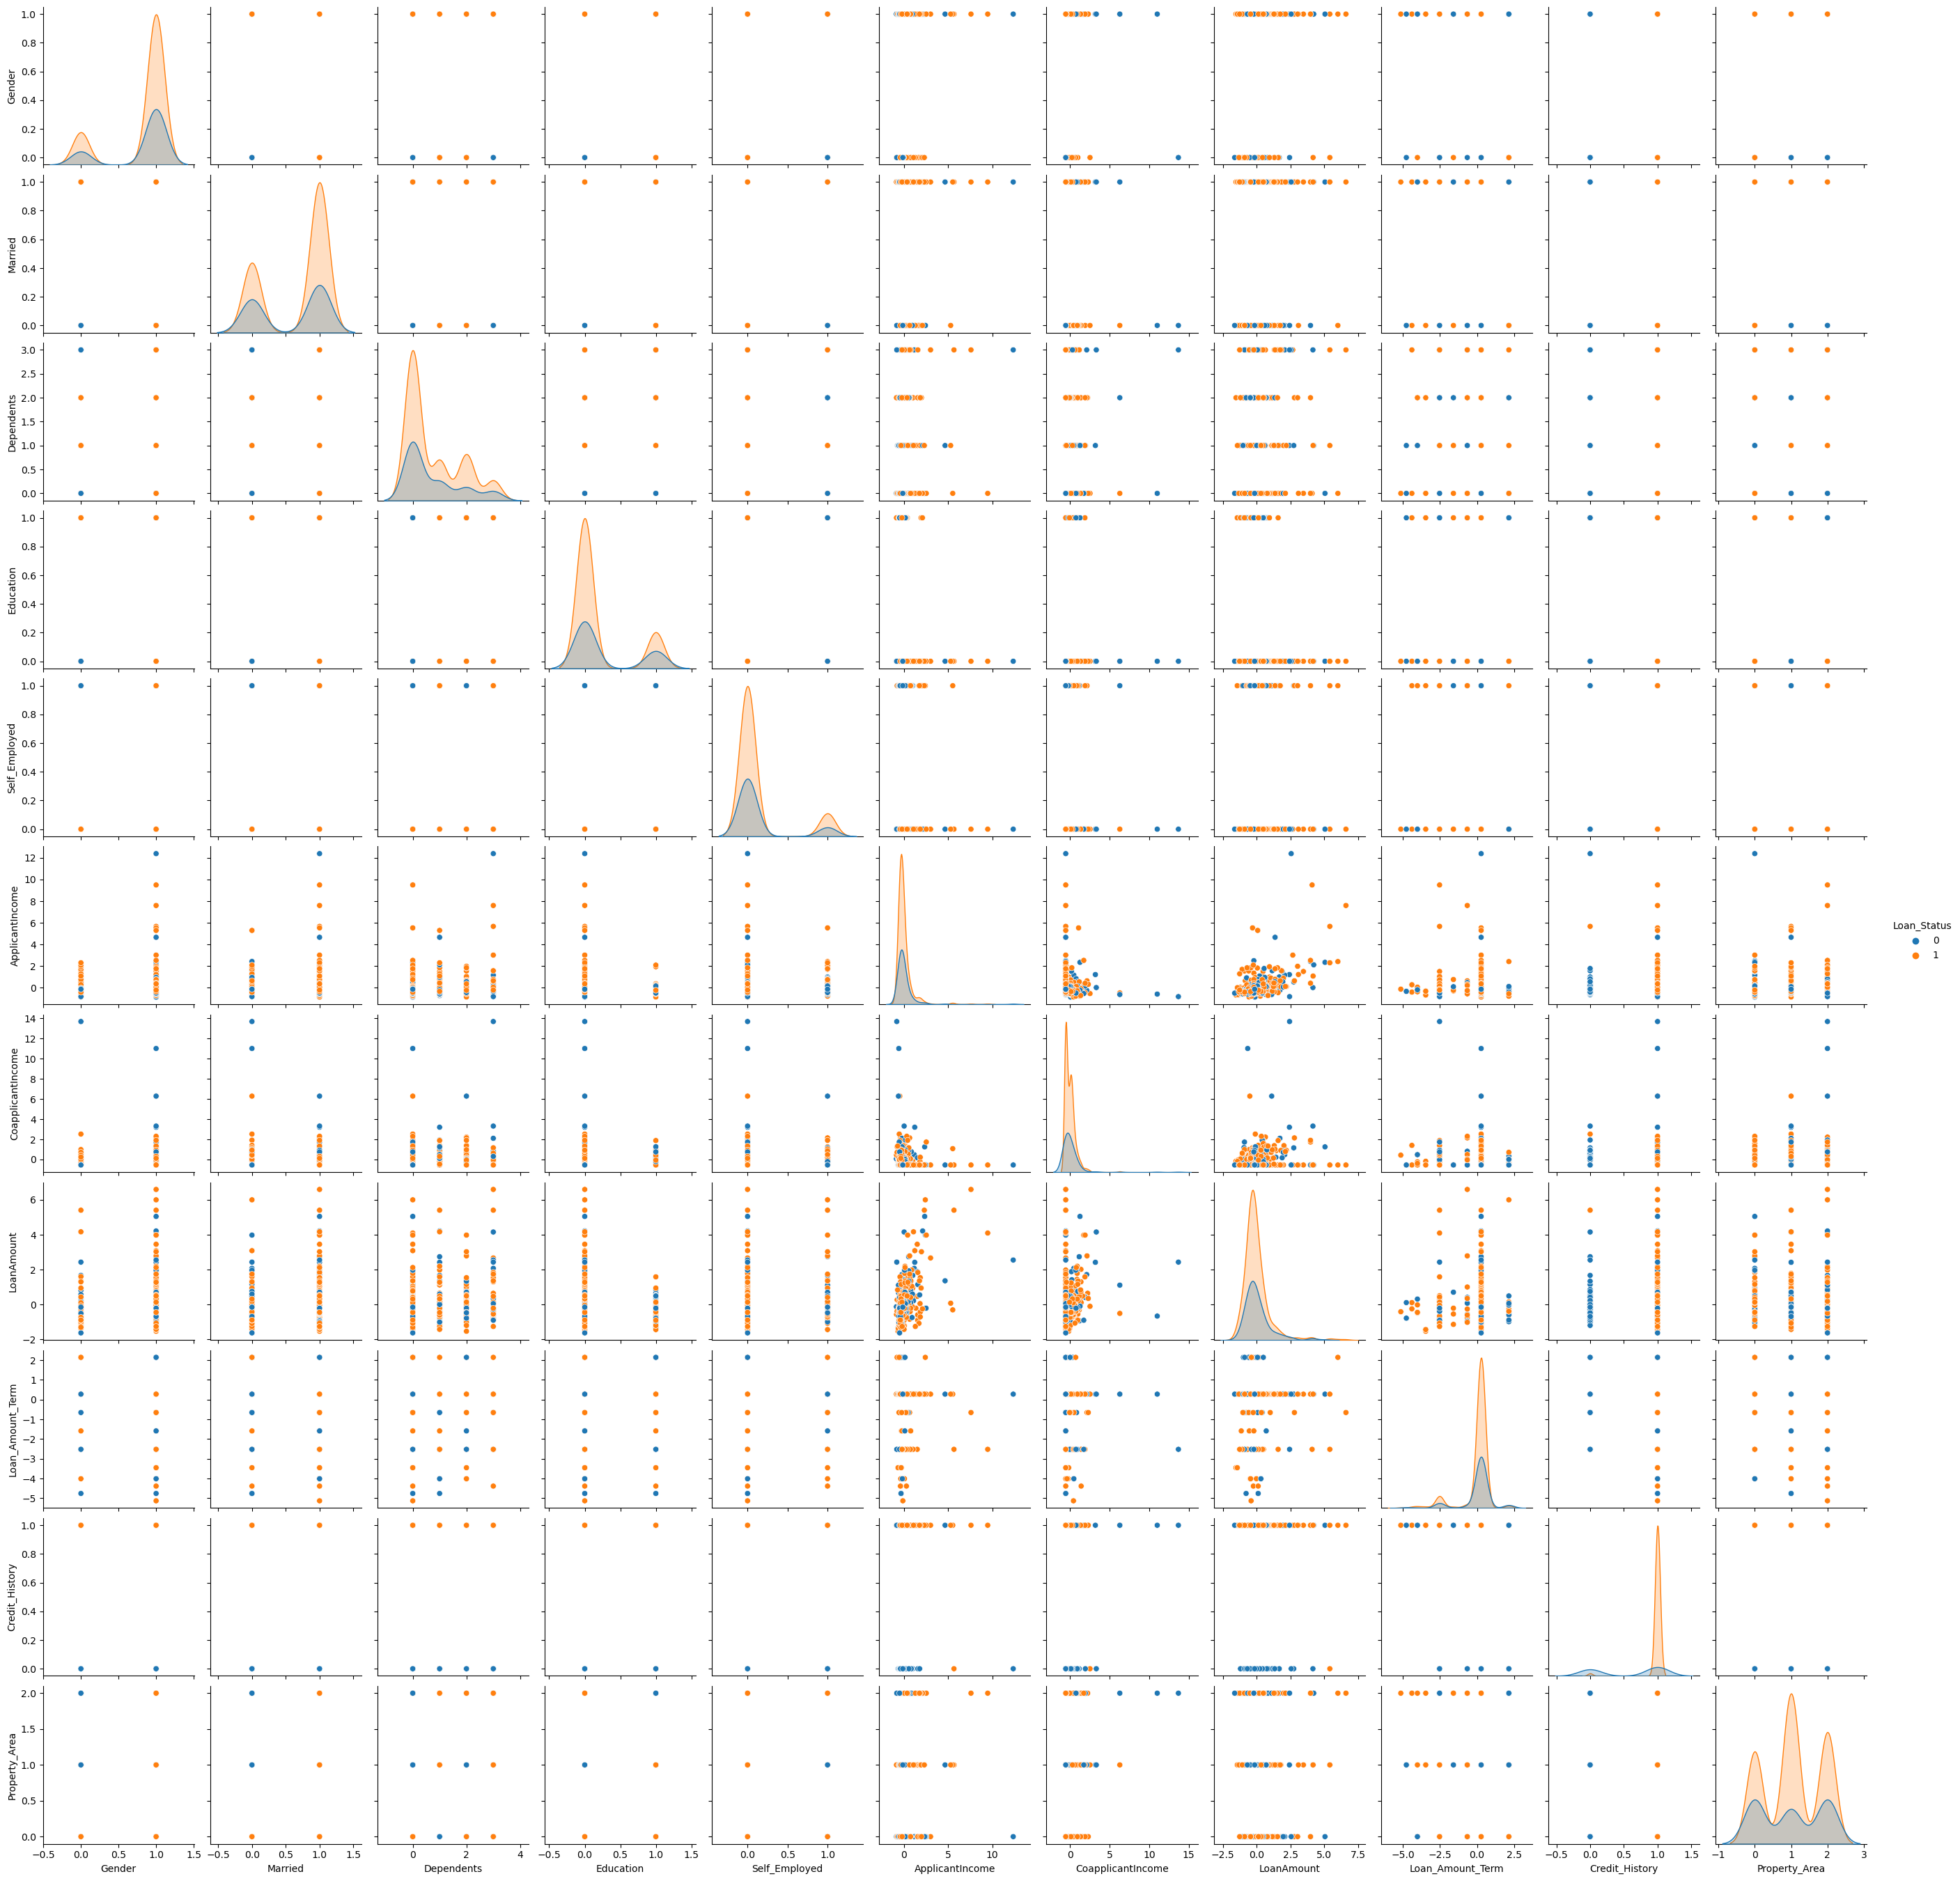

In [48]:
sns.pairplot(train_scaled, hue="Loan_Status")
plt.show()

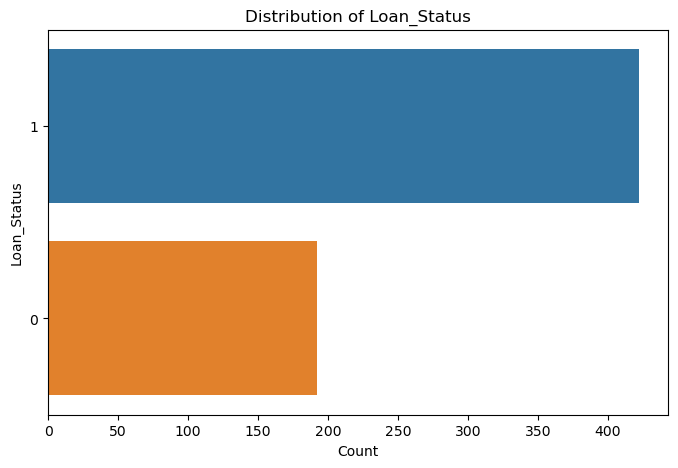

In [56]:
# Plot categorical feature distributions

plt.figure(figsize=(8, 5))
sns.countplot(y=train_scaled["Loan_Status"], order=train["Loan_Status"].value_counts().index)
plt.title(f"Distribution of Loan_Status")
plt.xlabel("Count")
plt.ylabel("Loan_Status")
plt.show()

In my experience: 
When I upsample then split into train test, there is a chance of getting overfit because some of the test values are already seen. 

But in this we already have the seperate test data we can upsample here. 

In [57]:
# Separate majority and minority classes
df_majority = train_scaled[train_scaled["Loan_Status"] == 1]
df_minority = train_scaled[train_scaled["Loan_Status"] == 0]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,  # Sample with replacement
                                 n_samples=len(df_majority),  # Match majority class count
                                 random_state=42)  # Ensure reproducibility

# Combine majority class with upsampled minority class
train_upsample = pd.concat([df_majority, df_minority_upsampled])

# Shuffle the dataset
train_upsample = train_upsample.sample(frac=1, random_state=42).reset_index(drop=True)

# Check class distribution after upsampling
print(train_upsample["Loan_Status"].value_counts())

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                   replace=False,  # No replacement (randomly remove samples)
                                   n_samples=len(df_minority),  # Match minority class count
                                   random_state=42)  # Ensure reproducibility

# Combine minority class with downsampled majority class
train_downsample = pd.concat([df_majority_downsampled, df_minority])

# Shuffle the dataset
train_downsample = train_downsample.sample(frac=1, random_state=42).reset_index(drop=True)

# Check class distribution after downsampling
print(train_downsample["Loan_Status"].value_counts())


Loan_Status
0    422
1    422
Name: count, dtype: int64
Loan_Status
0    192
1    192
Name: count, dtype: int64


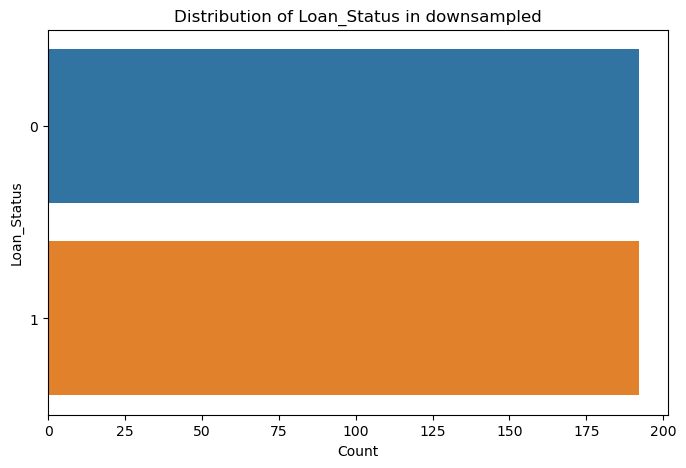

In [58]:
plt.figure(figsize=(8, 5))
sns.countplot(y=train_downsample["Loan_Status"], order=train_downsample["Loan_Status"].value_counts().index)
plt.title(f"Distribution of Loan_Status in downsampled")
plt.xlabel("Count")
plt.ylabel("Loan_Status")
plt.show()

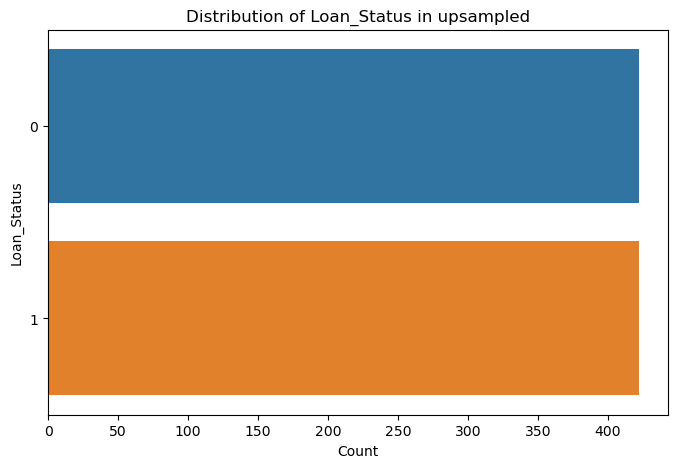

In [59]:
plt.figure(figsize=(8, 5))
sns.countplot(y=train_upsample["Loan_Status"], order=train_upsample["Loan_Status"].value_counts().index)
plt.title(f"Distribution of Loan_Status in upsampled")
plt.xlabel("Count")
plt.ylabel("Loan_Status")
plt.show()

In [42]:
train_downsample.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,0,0,0,5746,0.0,255.0,360.0,1.0,2,0
1,1,0,0,1,0,2333,1451.0,102.0,480.0,0.0,2,0
2,1,0,0,0,0,4680,2087.0,128.0,360.0,1.0,1,0
3,1,1,2,1,0,2309,1255.0,125.0,360.0,0.0,0,0
4,0,0,0,0,0,4547,0.0,115.0,360.0,1.0,1,1


In [41]:
train_upsample.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,2,0,1,1600,20000.0,239.0,360.0,1.0,2,0
1,1,1,1,1,0,3399,1640.0,111.0,180.0,1.0,2,1
2,1,1,2,0,1,2726,0.0,106.0,360.0,0.0,1,0
3,0,0,1,1,1,3867,0.0,62.0,360.0,1.0,1,0
4,1,1,0,0,0,1759,3541.0,131.0,360.0,1.0,1,1
